<a href="https://colab.research.google.com/github/fakhruddinarif/imgpro-compvis/blob/main/modul6/modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import math

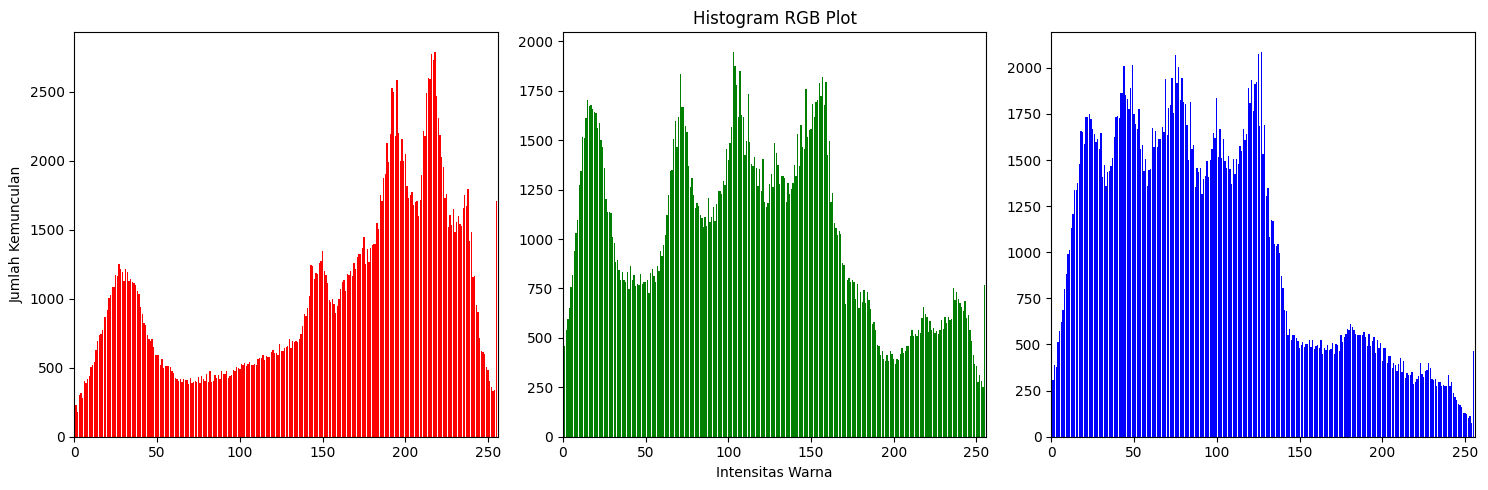

In [27]:
# Membaca gambar
img = cv.imread('/content/drive/MyDrive/imgpro_compvis/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Histogram
def calculate_histogram(channel):
  histogram = {}
  for row in channel:
      for pixel in row:
          if pixel in histogram:
              histogram[pixel] += 1
          else:
              histogram[pixel] = 1
  return histogram

# Plot histogram
def plot_histogram(histogram, color, index):
  intensities = sorted(histogram.keys())
  frequencies = [histogram[intensity] for intensity in intensities]
  plt.subplot(1, 3, index + 1)
  if index == 0:
    plt.ylabel("Jumlah Kemunculan")
  if index == 1:
    plt.title("Histogram RGB Plot")
    plt.xlabel("Intensitas Warna")
  plt.bar(intensities, frequencies, color=color)
  plt.xlim([0, 256])

channels = ('Red', 'Green', 'Blue')
colors = ('r', 'g', 'b')

plt.figure(figsize=(15, 5))

for i, color in enumerate(colors):
  histogram = calculate_histogram(img[:, :, i])
  plot_histogram(histogram, color, i)

plt.tight_layout()
plt.show()

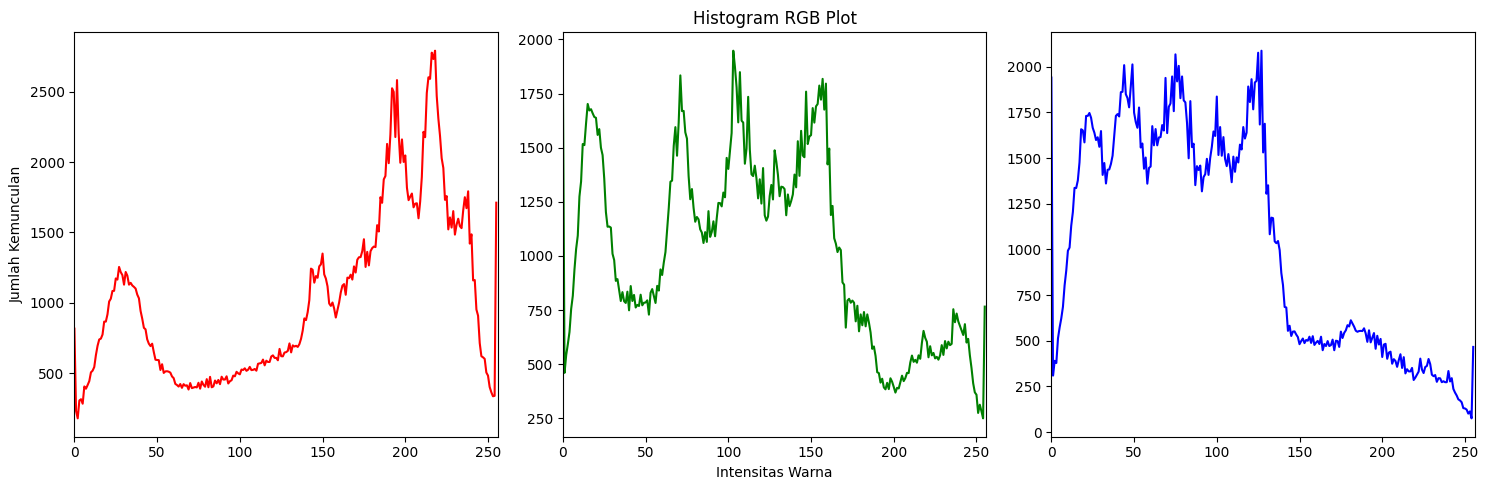

In [36]:
img = cv.imread('/content/drive/MyDrive/imgpro_compvis/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

channels = ('Red', 'Green', 'Blue')
colors = ('r', 'g', 'b')

plt.figure(figsize=(15, 5))

for i, color in enumerate(colors):
  plt.subplot(1, 3, i + 1)
  histogram, bins = np.histogram(img[:, :, i], 256, [0, 256])
  plt.plot(histogram, color=color)
  if i == 0:
    plt.ylabel("Jumlah Kemunculan")
  if i == 1:
    plt.title("Histogram RGB Plot")
    plt.xlabel("Intensitas Warna")
  plt.xlim([0, 256])

plt.tight_layout()
plt.show()

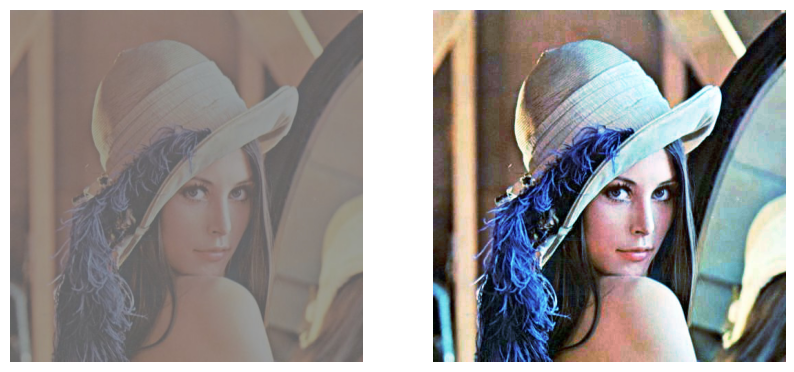

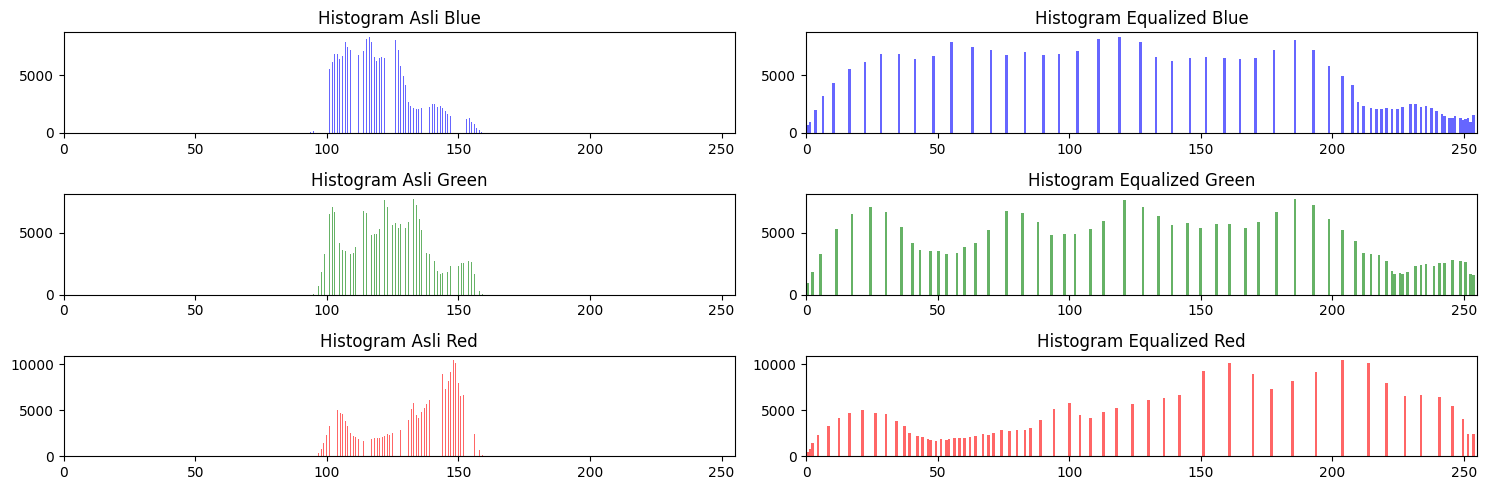

In [57]:
def histogram_equalization(img):
    height, width = img.shape
    histogram = [0] * 256
    for i in range(height):
        for j in range(width):
            histogram[img[i, j]] += 1

    cdf = [0] * 256
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + histogram[i]

    cdf_min = min([val for val in cdf if val > 0])
    cdf_max = cdf[-1]
    cdf_normalized = [int(255 * (val - cdf_min) / (cdf_max - cdf_min)) for val in cdf]

    equalized_img = np.zeros((height, width), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            equalized_img[i, j] = cdf_normalized[img[i, j]]

    return equalized_img

channels = ('Blue', 'Green', 'Red')
colors = ('b', 'g', 'r')

img = cv.imread('/content/drive/MyDrive/imgpro_compvis/lena_lc.jpg')

equalized = []
for i, color in enumerate(colors):
  equalized.append(histogram_equalization(img[:, :, i]))

equalized_image = cv.merge(equalized)

# Plot gambar asli dan hasil equalization
plt.figure(figsize=(10, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')

# Gambar setelah equalization
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

plt.figure(figsize=(15, 5))

for i, color in enumerate(colors):
  plt.subplot(3, 2, i * 2 + 1)
  plt.hist(img[:, :, i].ravel(), 256, color=color, alpha=0.6)
  plt.title(f'Histogram Asli {channels[i]}')
  plt.xlim([0, 255])

  plt.subplot(3, 2, i * 2 + 2)
  plt.hist(equalized[i].ravel(), 256, color=color, alpha=0.6)
  plt.title(f'Histogram Equalized {channels[i]}')
  plt.xlim([0, 255])

plt.tight_layout()
plt.show()

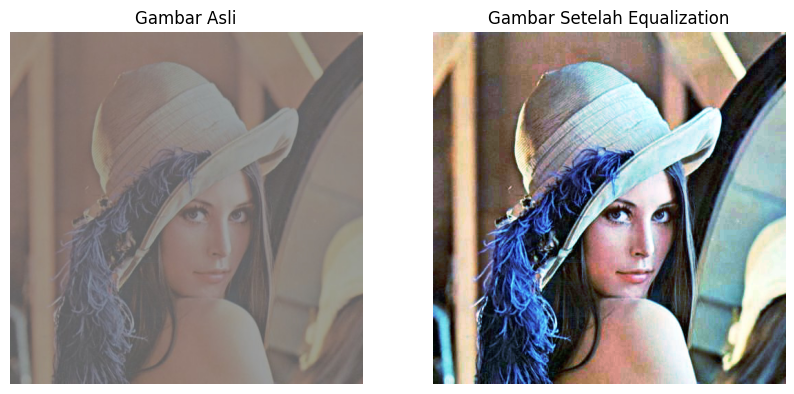

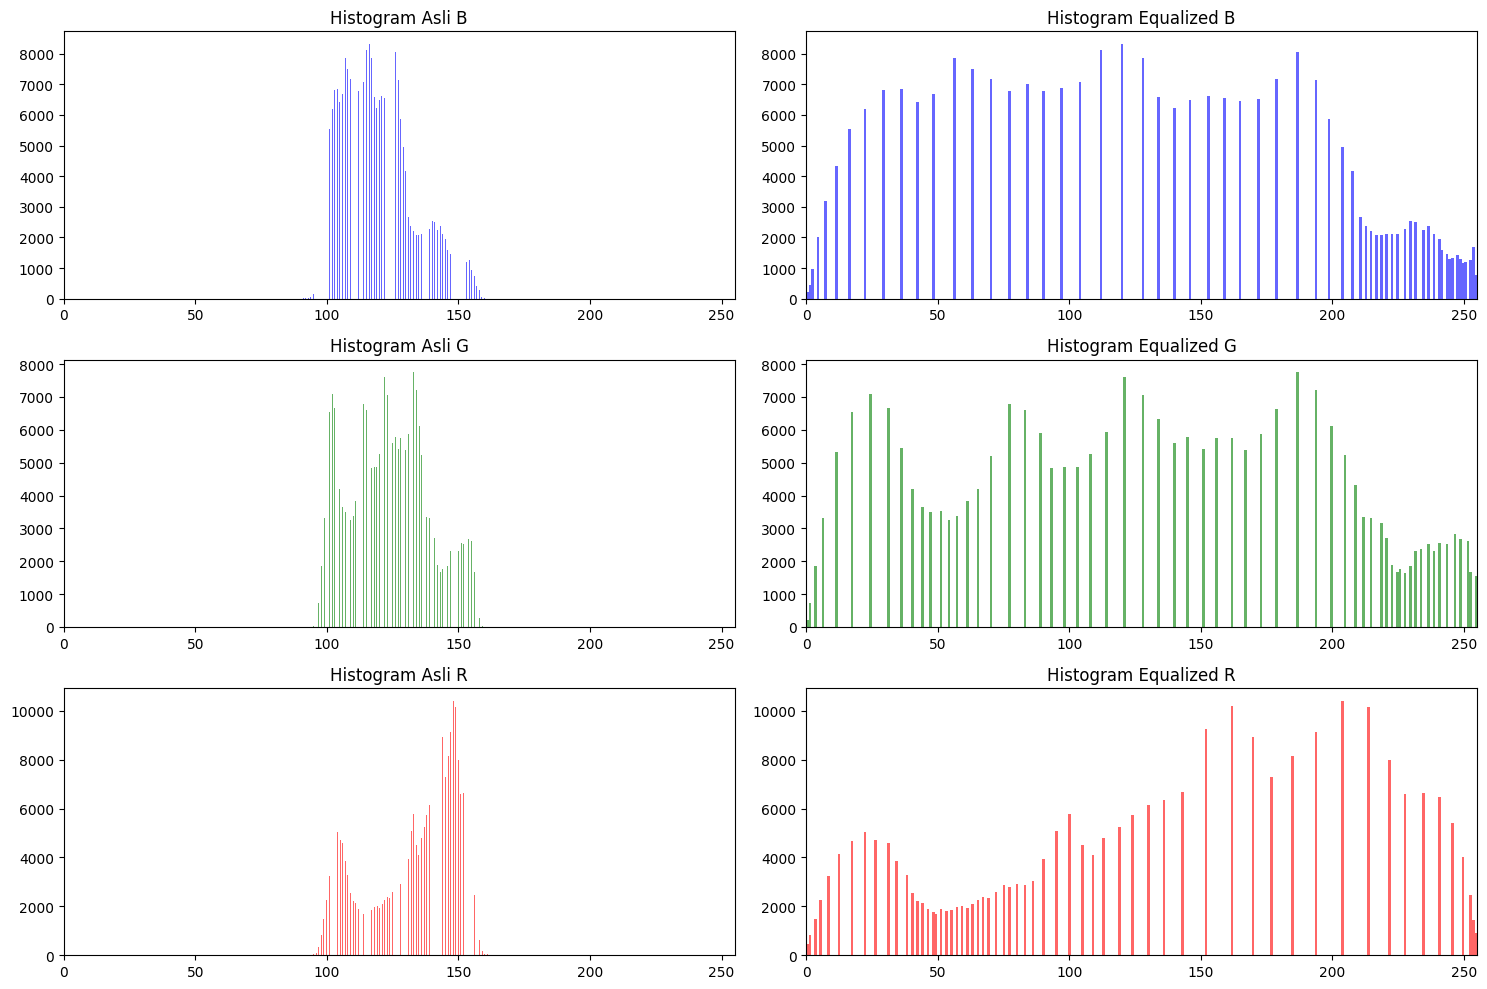

In [52]:
channels = ('Red', 'Green', 'Blue')
colors = ('r', 'g', 'b')

img = cv.imread('/content/drive/MyDrive/imgpro_compvis/lena_lc.jpg')

# Split image into BGR channels
b, g, r = cv.split(img)

# Apply equalizeHist to each channel
equalized_b = cv.equalizeHist(b)
equalized_g = cv.equalizeHist(g)
equalized_r = cv.equalizeHist(r)

# Merge equalized channels
equalized_img = cv.merge((equalized_b, equalized_g, equalized_r))


# Plot gambar asli dan hasil equalization
plt.figure(figsize=(10, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Gambar Asli')

# Gambar setelah equalization
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Gambar Setelah Equalization')

plt.show()


# Plot histogram asli dan hasil equalization untuk setiap channel
colors = ('b', 'g', 'r')
channels = [b, g, r]
equalized_channels = [equalized_b, equalized_g, equalized_r]

plt.figure(figsize=(15, 10))

for i, (channel, eq_channel, color) in enumerate(zip(channels, equalized_channels, colors)):
  plt.subplot(3, 2, i * 2 + 1)
  plt.hist(channel.ravel(), 256, color=color, alpha=0.6)
  plt.title(f'Histogram Asli {color.upper()}')
  plt.xlim([0, 255])

  plt.subplot(3, 2, i * 2 + 2)
  plt.hist(eq_channel.ravel(), 256, color=color, alpha=0.6)
  plt.title(f'Histogram Equalized {color.upper()}')
  plt.xlim([0, 255])

plt.tight_layout()
plt.show()


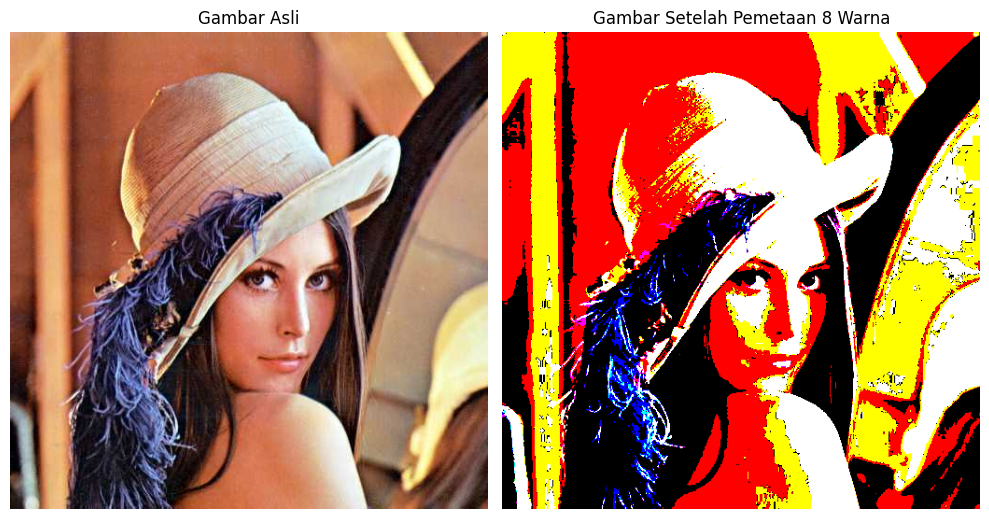

In [59]:
def map_rgb_to_8colors(img):
  height, width, _ = img.shape
  new_img = np.zeros((height, width, 3), dtype=np.uint8)

  for i in range(height):
    for j in range(width):
      r, g, b = img[i, j]

      # Definisi warna
      if r > 128 and g < 128 and b < 128:
          new_color = [255, 0, 0]  # Merah
      elif r < 128 and g > 128 and b < 128:
          new_color = [0, 255, 0]  # Hijau
      elif r > 128 and g > 128 and b < 128:
          new_color = [255, 255, 0]  # Kuning
      elif r < 128 and g < 128 and b > 128:
          new_color = [0, 0, 255]  # Biru
      elif r < 128 and g > 128 and b > 128:
          new_color = [0, 255, 255]  # Cyan
      elif r > 128 and g < 128 and b > 128:
          new_color = [255, 0, 255]  # Magenta
      elif r > 128 and g > 128 and b > 128:
          new_color = [255, 255, 255]  # Putih
      else:
          new_color = [0, 0, 0]  # Hitam (default)

      new_img[i, j] = new_color

  return new_img

img = cv.imread('/content/drive/MyDrive/imgpro_compvis/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

new_img = map_rgb_to_8colors(img)


# Plot gambar asli dan hasil pemetaan
plt.figure(figsize=(10, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Asli')
plt.axis('off')

# Gambar setelah pemetaan
plt.subplot(1, 2, 2)
plt.imshow(new_img)
plt.title('Gambar Setelah Pemetaan 8 Warna')
plt.axis('off')

plt.tight_layout()
plt.show()